In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
#REPPU
mlat = np.linspace(53.1, 89.7, 30) #30 intervals between 53.1° to 89.7°
mlt= np.linspace(1.6, 357.6, 80) #80 intervals between 1.6° to 357.6°

#AMPERE
#mlat = np.linspace(40,90,50) #50 intervals between 40° to 90°
#mlt = np.linspace(0,360, 24) #24 intervals between 0° to 360°

def calculate_delta(lat1, lon1, lat2, lon2):
    R_E = 6371.0 * 1e3 #meters

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    delta_x = (dlat / 360)*2*np.pi*R_E
    delta_y = (dlon / 360)*2*np.pi*R_E*np.sin(lat1_rad)

    return delta_x, delta_y

# Initialize a 50x24 grid for areas
areas = np.zeros((29, 79))

# Loop through latitude and longitude pairs to calculate areas
for i in range(len(mlat) - 1):
    for j in range(len(mlt) - 1):
        lat1, lat2 = mlat[i], mlat[i + 1]
        lon1, lon2 = mlt[j], mlt[j + 1]
        
        delta_x, delta_y = calculate_delta(lat1, lon1, lat2, lon2)
        
        area = delta_x * delta_y
        areas[i, j] = area

#divide area values by 1e3
#areas = areas / 1e6
areas

array([[17129687.459596  , 17129687.45959599, 17129687.459596  , ...,
        17129687.45959618, 17129687.45959599, 17129687.45959599],
       [17408808.96951248, 17408808.96951247, 17408808.96951248, ...,
        17408808.96951265, 17408808.96951246, 17408808.96951246],
       [17679484.06454751, 17679484.0645475 , 17679484.06454751, ...,
        17679484.06454769, 17679484.06454749, 17679484.06454749],
       ...,
       [21366101.03723049, 21366101.03723048, 21366101.03723049, ...,
        21366101.03723071, 21366101.03723047, 21366101.03723047],
       [21394536.88522474, 21394536.88522473, 21394536.88522474, ...,
        21394536.88522496, 21394536.88522472, 21394536.88522472],
       [21412592.52081857, 21412592.52081855, 21412592.52081857, ...,
        21412592.52081878, 21412592.52081855, 21412592.52081855]])

In [174]:
#fig, ax = plt.subplots(figsize=(24, 9))
#sns.heatmap(areas, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Area (m^2)'}, fmt='.0f', annot=True)
#set y ticks labels to be from 90 down to 40
#ax.set_yticklabels(np.flip(np.arange(41, 90, 1)))

In [176]:
def weighted_loss(prediction, target, weights):
    loss = prediction - target #MAE

    weighted_loss = loss * weights
    
    return weighted_loss

target = np.ones((29, 79))
prediction = target + 1.1
weights = areas
weights = np.flipud(weights)

weight_loss = weighted_loss(prediction, target, weights)
#fig, ax = plt.subplots(figsize=(24, 9))
#sns.heatmap(weight_loss, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Loss (MSE)'}, fmt='.0f', annot=True)
#ax.set_yticklabels(np.flip(np.arange(53, 89, 1)))
weight_loss

array([[23553851.77290043, 23553851.77290041, 23553851.77290043, ...,
        23553851.77290067, 23553851.7729004 , 23553851.7729004 ],
       [23533990.57374722, 23533990.5737472 , 23533990.57374722, ...,
        23533990.57374746, 23533990.57374719, 23533990.57374719],
       [23502711.14095354, 23502711.14095353, 23502711.14095354, ...,
        23502711.14095378, 23502711.14095352, 23502711.14095352],
       ...,
       [19447432.47100227, 19447432.47100225, 19447432.47100227, ...,
        19447432.47100246, 19447432.47100224, 19447432.47100224],
       [19149689.86646373, 19149689.86646371, 19149689.86646373, ...,
        19149689.86646392, 19149689.86646371, 19149689.86646371],
       [18842656.20555561, 18842656.2055556 , 18842656.20555561, ...,
        18842656.2055558 , 18842656.20555558, 18842656.20555558]])

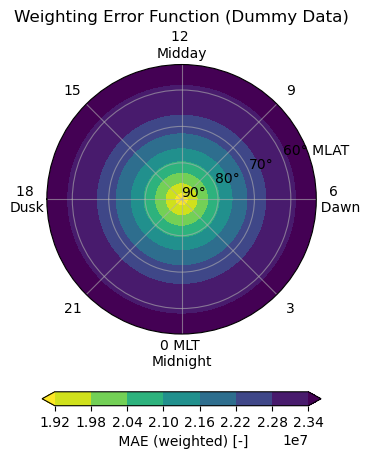

In [177]:
# Define common parameters
theta = np.linspace(0, 360, 79) - 90
theta_rad = theta / 360 * 2 * np.pi
r = 90 - np.linspace(53.1, 89.7, 29)
shrink = .6

# Plot true values
abs_error = weight_loss
#abs_error = np.flipud(abs_error) # flip the array upside down

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6,5))

c_true = ax.contourf(theta_rad, r, abs_error,  cmap='viridis_r', extend='both')
ax.set_ylim([0, 37])
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["90°", "80°", "70°", "60° MLAT"])
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks(np.linspace(-np.pi, np.pi, 9)[1:])
ax.set_xticklabels(["21", "0 MLT \nMidnight", "3", "6 \n  Dawn", "9", "12 \nMidday", "15", "18 \nDusk"])
ax.set_title(f'Weighting Error Function (Dummy Data)')
plt.colorbar(c_true, ax=ax, label=' MAE (weighted) [-]', shrink=shrink, pad=0.15, orientation='horizontal')
ax.grid(True, linestyle='-', alpha=0.6)
#plt.tight_layout()
#plt.savefig('smrai_esn_ID25.png', dpi=400, bbox_inches='tight')